# MilleFeuille
Notebook to sketch out ideas and concept for a python datastructure

In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas
import millefeuille as mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# from: https://openflights.org/data.html#airport
airports = pandas.read_csv('../data/airports.dat', header=None, dtype=str)
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "time_offset", "dst", "timezone", "type", 'source']

In [5]:
airports[:10]
#list(airports.columns)
airports.altitude = airports.altitude.astype(float)
airports.latitude = airports.latitude.astype(float)
airports.longitude = airports.longitude.astype(float)

In [6]:
# from: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
#earthquakes = pandas.read_csv('data/earthquakes_all_month.csv')
# from https://serc.carleton.edu/eet/earthquakes2/part_1.html
earthquakes = pandas.read_csv('../data/sig_bigeq.csv')
earthquakes['longitude'] = earthquakes['Longitude']
earthquakes['latitude'] = earthquakes['Latitude']

/home/peller/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/peller/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/peller/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


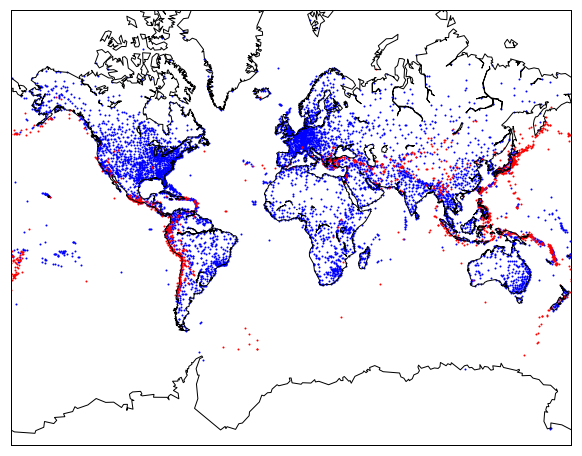

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

f = plt.figure(figsize=(20,8))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))
m.scatter(x,y,1,marker='o',color='b')
x, y = m(list(earthquakes["longitude"].astype(float)), list(earthquakes["latitude"].astype(float)))
m.scatter(x,y,1,marker='o',color='r')

In [578]:
# GridLayer
# FunctionLayer? or KDELayer, SplineLayer, ...

In [17]:
my_data = mf.DataStack('data')
# create layers
airports_layer = mf.PointLayer(airports, 'airports')
earthquakes_layer = mf.PointLayer(earthquakes, 'earthquakes')
longitude_edges = np.linspace(-180, 180, 101)
latitude_edges = np.linspace(-90, 90, 101)
geo_binning = mf.Binning(['longitude', 'latitude'], [longitude_edges, latitude_edges])
geo_hist_layer = mf.BinLayer(geo_binning, 'geo_hist')
# add layers to stack
my_data.add_layer(airports_layer)
my_data.add_layer(earthquakes_layer)
my_data.add_layer(geo_hist_layer)

In [18]:
# do some translations
my_data.translate(var='Magnitude', source='earthquakes', dest='geo_hist', method='mean')
my_data.translate(var='altitude', source='airports', dest='geo_hist', method='mean')
my_data.translate(source='airports', dest='geo_hist', method='count', dest_var='airport_density')
my_data.translate(source='earthquakes', dest='geo_hist', method='count', dest_var='earthquake_density')
my_data.translate(source='geo_hist', dest='airports', var='earthquake_density', method='lookup')

In [12]:
my_data['airports'].data.sort_values(by=['earthquake_density'], ascending=False)[:20]

,id,name,city,country,code,icao,latitude,longitude,altitude,time_offset,dst,timezone,type,source,earthquake_density
2247,2347,Sendai Airport,Sendai,Japan,SDJ,RJSS,38.139702,140.917007,15.0,9,U,Asia/Tokyo,airport,OurAirports,24.0
2248,2348,Matsushima Air Base,Matsushima,Japan,\N,RJST,38.404900,141.220001,7.0,9,U,Asia/Tokyo,airport,OurAirports,24.0
2244,2344,Hanamaki Airport,Hanamaki,Japan,HNA,RJSI,39.428600,141.134995,297.0,9,U,Asia/Tokyo,airport,OurAirports,24.0
1727,1783,General Juan N Alvarez International Airport,Acapulco,Mexico,ACA,MMAA,16.757099,-99.753998,16.0,-6,S,America/Mexico_City,airport,OurAirports,17.0
1735,1791,Chilpancingo Airport,Chilpancingo,Mexico,\N,MMCH,17.573799,-99.514297,4199.0,-6,S,America/Mexico_City,airport,OurAirports,17.0
4122,5435,Tokua Airport,Tokua,Papua New Guinea,RAB,AYTK,-4.340460,152.380005,32.0,10,U,Pacific/Port_Moresby,airport,OurAirports,15.0
2553,2688,Mariscal Sucre International Airport,Quito,Ecuador,UIO,SEQM,-0.129167,-78.357500,7841.0,-5,U,America/Guayaquil,airport,OurAirports,14.0
2554,2689,Chimborazo Airport,Riobamba,Ecuador,\N,SERB,-1.653430,-78.656097,9151.0,-5,U,America/Guayaquil,airport,OurAirports,14.0
2559,2695,Mayor Galo Torres Airport,Tena,Ecuador,\N,SETE,-0.986767,-77.819504,1708.0,-5,U,America/Guayaquil,airport,OurAirports,14.0
2560,2696,Tarapoa Airport,Tarapoa,Ecuador,TPC,SETR,-0.122956,-76.337799,814.0,-5,U,America/Guayaquil,airport,OurAirports,14.0


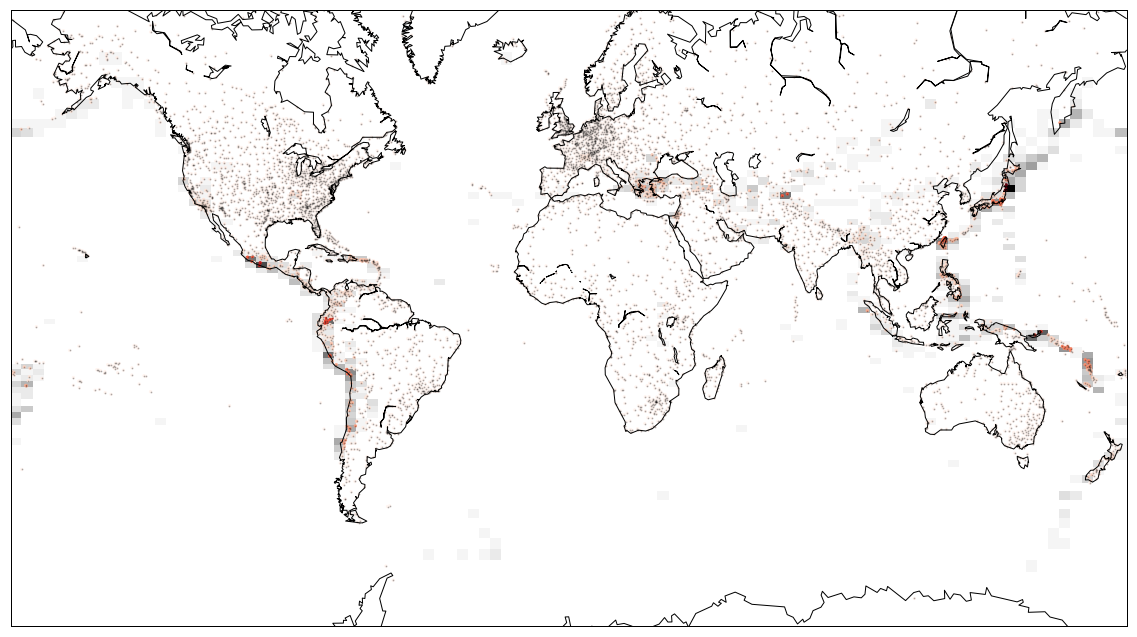

In [13]:
f = plt.figure(figsize=(20,15))
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()

x, y = m(*my_data.layers['geo_hist'].meshgrid)
data = my_data['geo_hist'].get_array('earthquake_density')
plt.pcolormesh(x,y,data.T, vmin=np.min(data), vmax=np.max(data), cmap='gray_r')

#x, y = m(list(my_data['earthquakes']['longitude']), list(my_data['earthquakes']['latitude']))
#m.scatter(x,y,my_data['earthquakes']['Magnitude'],marker='o',c='orange', alpha=0.2)

x, y = m(list(my_data['airports']['longitude']), list(my_data['airports']['latitude']))
m.scatter(x,y,5,marker='o',c=my_data['airports']['earthquake_density'], alpha=1, cmap='Reds')
m.scatter(x,y,1,marker='o',c='k', alpha=0.2)
